In [39]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [40]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [41]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [42]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [43]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [44]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [45]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [46]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [47]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

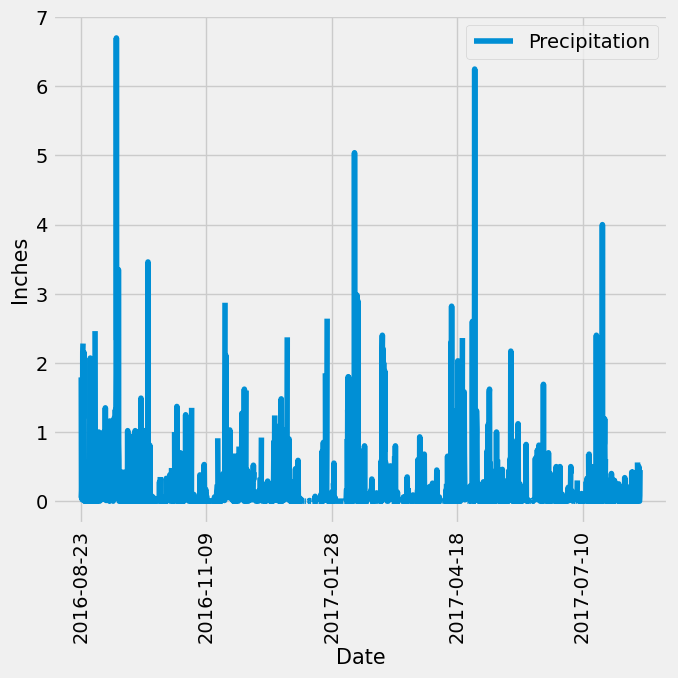

In [48]:
# Referencing from 10-Advanced-SQL Class 3 02-Ins_Date
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(measurement.date).order_by(measurement.date.desc()).first()


# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
result=session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
climate_df = pd.DataFrame(result, columns=["Date", "Precipitation"]).sort_values(by='Date')

# Sort the dataframe by date
climate_df.set_index(climate_df["Date"],inplace=True)


# Use Pandas Plotting with Matplotlib to plot the data
climate_df.plot(figsize=(7, 7), rot=90, use_index=True)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Inches', fontsize=15)
plt.tight_layout()
plt.show()

In [49]:
# Use Pandas to calculate the summary statistics for the precipitation data
climate_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [50]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(func.count(station.id)).all()
stations

[(9,)]

In [51]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [52]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mactive_station = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == "USC00519281").all()

mactive_station

[(54.0, 85.0, 71.66378066378067)]

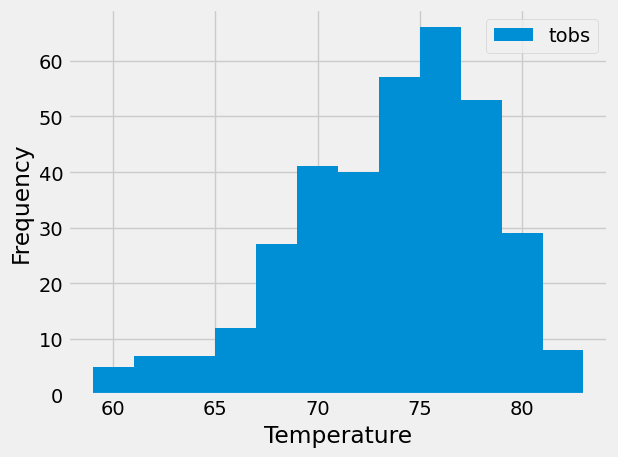

In [53]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(measurement.tobs).filter(measurement.station == "USC00519281").\
    filter(measurement.date >= query_date).all()

temp_df = pd.DataFrame(temp_data, columns=["tobs"])

temp_df.plot.hist(bins = 12)

plt.xlabel('Temperature')
plt.tight_layout()
plt.show()


# Close Session

In [54]:
# Close Session
session.close()